# **Introduction**
Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.
For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.



# Business Understanding
Vodafone is a leadng telecommunication company in EUrope and Africa, led by their mission to connect for a better future.Vodafone Corporation aims to reduce customer churn and improve retention strategies by leveraging machine learning models. The primary objective is to accurately predict the likelihood of customer churn based on historical data and identify the key indicators that drive churn behavior. By understanding the factors influencing churn, Vodafone aims to proactively implement targeted retention strategies to mitigate customer attrition. The marketing and sales teams are eager to receive actionable insights and recommendations that will enable them to develop personalized retention campaigns and enhance customer satisfaction. The project's success will be measured by the reduction in churn rate, improved customer retention, and increased customer loyalty. The available resources include a comprehensive dataset provided by the marketing and sales teams, a designated budget for analysis and model development, and a timeline of three months for the completion of the project. The findings will be presented to the business development unit, marketing, and sales teams, with the expectation that the insights will guide strategic decision-making and contribute to Vodafone's overall growth and profitability.

# Hypothesis
Null Hypothesis: There is no significant relationship between the customer's internet service provider and their likelihood of churn

Alterntive Hypothesis : There is a significant relationship between the Customer's internet service provider and their likelihood of churn


# QUestions
1. What is the overall churn rate?
2. Is there a relationship between the tenure of a customer and their likelihood of churn?
3. Does the type of internet service influence customer churn?
4. Is there a correlation between the customer's payment method and churn rate?
5. Does the presence of paperless billing affect customer churn?

# Data Understanding
The first 3000 records of the dataset can be found in a database that will be accessed remotely.The database for this project is MIRCORSOFT SQL SERVER. To connect to this database I used an Open Database Connectivity standard library pyodbc
#or an Object-Relational Mapping library SQLAlchemy.

THe second dataset is a csv file, with 2000 records.
THe third dataset is the test dataset.
The column description of this datasets is:
The data for this project is in a csv format. The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)


# Installation

In [250]:
!pip install  pyodbc

# Importations

In [251]:
# import the necessary packages you need

import pyodbc
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

#Imputing missing values library
from sklearn.impute import SimpleImputer

## Data Reading

In [252]:
#Test dataset

test = pd.read_excel('Test.xlsx')
#THe first set of data set

#The first set of dataset
file_url ='https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/main/LP2_Telco-churn-last-2000.csv'
# Read the file into a DataFrame
data1 = pd.read_csv(file_url)

In [253]:
#Reading the second set of the dataset from a remote database

# creating the server instance variable 
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'dataAnalyst_LP2'
password = 'A3g@3kR$2y'

# This an f string that includes all the variable above to extablish a connection to the server
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [254]:
# use the connect method of the pyodbc library and pass in the connection string. This will connect to the server and might
# take a few seconds to be complete. Check your internet connection if takes more time than necessary

connection = pyodbc.connect(connection_string)

In [255]:
# Now the sql query to get the data is what what you see below. Note that you will not have permissions to insert 
# delete or uodate this database table. dbo.LP2_Telco_churn_first_3000 is the name of the table. The dbo 
# in front of the table is a naming convention in Microsoft SQL Server

query = "Select * from dbo.LP2_Telco_churn_first_3000"
data2 = pd.read_sql(query, connection)

In [256]:
data2.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [257]:
data2.shape

(3000, 21)

In [258]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [259]:
# You can concatenate this with other DataFrames to get one data set for your work
train = pd.concat([data2, data1])
train.to_csv('telco_churn.csv')

## Exploratory Data Analysis

In [260]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [261]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [262]:
#THe number of rows and data types of each rows in the combined dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


The combined dataser has 5043 rows and 20 columns. All the columns are object data type except for the tenure and MonthlyCharges. Some of the columns have got missing values.

In [263]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


THe test dataset has 2000 rows and 20 columns. The target column, Churn is not in the dataset.

In [264]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


For the tenure column:

The average tenure is approximately 32.58 months, indicating that, on average, customers have been with the company for around 2.7 years.
The standard deviation is relatively high (24.53), suggesting that there is a wide variation in customer tenure. This could indicate that there are both long-term and short-term customers in the dataset.
The median value (50th percentile) of 29 months suggests that half of the customers have been with the company for less than 2.5 years.
The maximum tenure of 72 months suggests the presence of long-term customers who have been with the company for the entire duration of the dataset.

For Monthly Charges Column:

The average monthly charge is approximately 65.09, which shows the average amount that customers are billed per month.
The highest amount charged to a customer is 118.65 and the minimum is 18.4
A quarter of the customers have relatively low monthly charges, that is below 35.77.half of the customers have a monthly charge below 71 and three-quarters of the customers have monthly charges below 90.05.

In [228]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2000.0,0.161500,0.368084,0.00,0.00,0.0,0.000,1.00
tenure,2000.0,31.853000,24.632677,0.00,8.00,27.0,55.000,72.00
MonthlyCharges,2000.0,63.933325,30.136858,18.25,34.25,69.8,89.275,118.75


In [229]:
#Checking for duplicates in the train dataset
train.duplicated().sum()

0

In [230]:
#Checking for duplicates in the test data set
test.duplicated().sum()

0

In [265]:
train.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [266]:
test.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

THe test dataset does not have any missing values. However, the data types for some of it columns are not correct, and when changed, they might reveal some missing values.

In [233]:
#Combining the train and the test data set
#Label the train dataset with train to differentiate with the test
#train['set'] = train
#Labeling the test dataset as test
#test['set] = test
#Combining the train and test dataset 
#df = pd.concat([test, train])
#train = [df['set]=='train']
#test = [df['set]=='test']
#train = train.drop('set', 1)
#test = test.drop('set', 1)

In [234]:
train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Univariate Analysis

In [267]:
#The number each of the categories occurs
print('The categories in the OnlineSecurity column are: ')
print(train['OnlineSecurity'].value_counts())

print('\n The categories in the gender column are: ')
print(train['gender'].value_counts())

print('\n The columns in the SeniorCitizen column are: ')
print(train['SeniorCitizen'].value_counts())

print('\n The categories in the partner column are: ')
print(train['Partner'].value_counts())

print('\n The categories in the paymentmethod column are: ')
print(train['PaymentMethod'].value_counts())

print('\n The categories in the contract column are: ')
print(train['Contract'].value_counts())

print('\n The categories in the StreamingMovies column are: ')
print(train['StreamingMovies'].value_counts())

print('\n The categories in the Techsupport column are: ')
print(train['TechSupport'].value_counts())


The categories in the OnlineSecurity column are: 
False                  1478
No                     1029
True                    871
Yes                     585
No internet service     429
Name: OnlineSecurity, dtype: int64

 The categories in the gender column are: 
Male      2559
Female    2484
Name: gender, dtype: int64

 The columns in the SeniorCitizen column are: 
False    4224
True      819
Name: SeniorCitizen, dtype: int64

 The categories in the partner column are: 
False    1538
True     1462
No       1047
Yes       996
Name: Partner, dtype: int64

 The categories in the paymentmethod column are: 
Electronic check             1700
Mailed check                 1128
Bank transfer (automatic)    1125
Credit card (automatic)      1090
Name: PaymentMethod, dtype: int64

 The categories in the contract column are: 
Month-to-month    2744
Two year          1244
One year          1055
Name: Contract, dtype: int64

 The categories in the StreamingMovies column are: 
True             

In [236]:
#The number each of the categories occurs in the test dataset
print('The categories in the OnlineSecurity column are: ')
print(test['OnlineSecurity'].value_counts())

print('\n The categories in the gender column are: ')
print(test['gender'].value_counts())

print('\n The columns in the SeniorCitizen column are: ')
print(test['SeniorCitizen'].value_counts())

print('\n The categories in the partner column are: ')
print(test['Partner'].value_counts())

print('\n The categories in the paymentmethod column are: ')
print(test['PaymentMethod'].value_counts())

print('\n The categories in the contract column are: ')
print(test['Contract'].value_counts())

print('\n The categories in the StreamingMovies column are: ')
print(test['StreamingMovies'].value_counts())

print('\n The categories in the Techsupport column are: ')
print(test['TechSupport'].value_counts())


The categories in the OnlineSecurity column are: 
No                     991
Yes                    563
No internet service    446
Name: OnlineSecurity, dtype: int64

 The categories in the gender column are: 
Female    1004
Male       996
Name: gender, dtype: int64

 The columns in the SeniorCitizen column are: 
0    1677
1     323
Name: SeniorCitizen, dtype: int64

 The categories in the partner column are: 
No     1056
Yes     944
Name: Partner, dtype: int64

 The categories in the paymentmethod column are: 
Electronic check             665
Mailed check                 484
Credit card (automatic)      432
Bank transfer (automatic)    419
Name: PaymentMethod, dtype: int64

 The categories in the contract column are: 
Month-to-month    1131
Two year           451
One year           418
Name: Contract, dtype: int64

 The categories in the StreamingMovies column are: 
No                     804
Yes                    750
No internet service    446
Name: StreamingMovies, dtype: int64

 T

In [268]:
#The number of categories in the target column
train['Churn'].unique()

array([False, True, None, 'No', 'Yes'], dtype=object)

The responses should only be either Yes or No. In this case, True means Yes, while False means No.

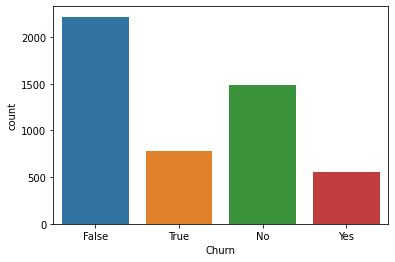

In [269]:
#THe distribution of the categories in the Churn column
sns.countplot(x='Churn', data=train)
plt.show()

True and Yes represent the customers that Churned while False and No represent the customer who did not Churn. 

<function matplotlib.pyplot.show(close=None, block=None)>

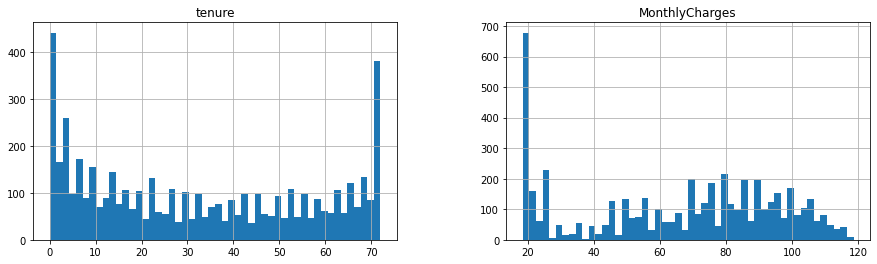

In [270]:
train.hist(bins=50, figsize = (15,4))
plt.show

The histogram indicates a non-linear distribution of values for the tenure column. It suggests that there are concentrations of values at both ends of the range, with fewer values in the middle.
For the Monthly Charges column, it shows that the values are slightly right skewed.

## Bivariate And Multivariate Analysis

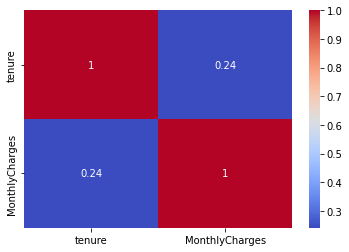

In [240]:
# Compute the correlation matrix
corr_matrix = train.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

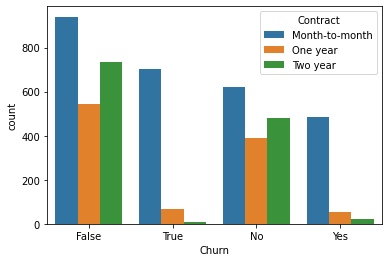

In [241]:
sns.countplot(x='Churn', data=train, hue='Contract')
plt.show()

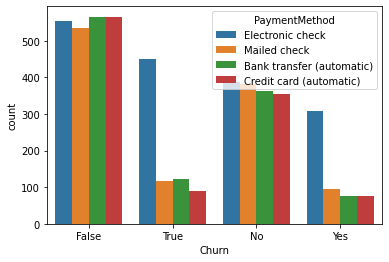

In [242]:
# Create a bar plot of Churn and PaymentMethod
sns.countplot(x='Churn', hue='PaymentMethod', data=train)
plt.show()

The graph shouls the different payment methods and whether they churned or not.

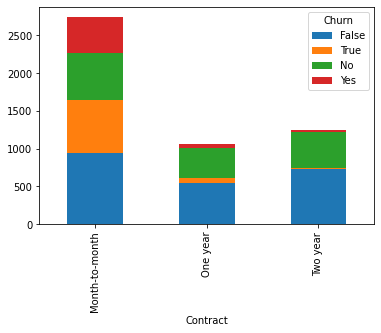

In [243]:
# Create a stacked bar plot of Churn and Contract
cross_tab = pd.crosstab(train['Contract'], train['Churn'])
cross_tab.plot(kind='bar', stacked=True)
plt.show()

In [244]:
# Cross-tabulate Churn and SeniorCitizen
cross_tab = pd.crosstab(train['Churn'], train['SeniorCitizen'])
print(cross_tab)

SeniorCitizen  False  True
Churn                     
False           1936   283
True             588   192
No              1291   196
Yes              408   148


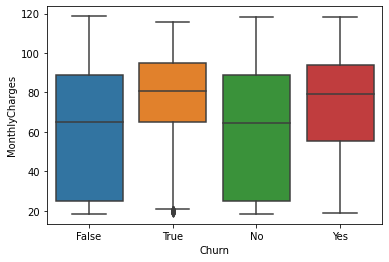

In [245]:
# Create a box plot of MonthlyCharges and Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=train)
plt.show()


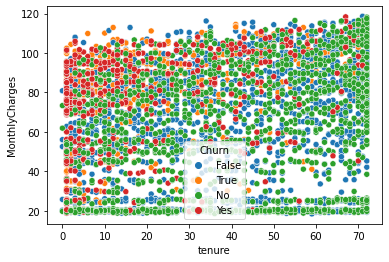

In [246]:
# Create a scatter plot of Tenure vs. TotalCharges with Churn as color
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=train)
plt.show()

## Data Cleaning

THe responses, like in Churn, should be bivariate. We first standardize the responses, Into either Yes/NO or True/ False, based on the columns description.

In [271]:
#Replacing True/False into Yes and No respectively in the Churn Column
train['Churn'] = train['Churn'].apply(lambda x:str(x).replace("True","Yes"))
train['Churn'] = train['Churn'].apply(lambda x:str(x).replace("False","No"))
#WE replace None with No, which is the mode 
train['Churn'] = train['Churn'].apply(lambda x:str(x).replace("None","No"))

#We replace even for the Online securit column
train['OnlineSecurity'] = train['OnlineSecurity'].apply(lambda x:str(x).replace("True","Yes"))
train['OnlineSecurity'] = train['OnlineSecurity'].apply(lambda x:str(x).replace("False","No"))
#Replace for the Partner Column
train['Partner'] = train['Partner'].apply(lambda x:str(x).replace("True","Yes"))
train['Partner'] = train['Partner'].apply(lambda x:str(x).replace("False","No"))
#Replacing for the Streaming movies column
train['StreamingMovies'] = train['StreamingMovies'].apply(lambda x:str(x).replace("True","Yes"))
train['StreamingMovies'] = train['StreamingMovies'].apply(lambda x:str(x).replace("False","No"))
#Replacing for the tech support column
train['Techsupport'] = train['TechSupport'].apply(lambda x:str(x).replace("True","Yes"))
train['Techsupport'] = train['Techsupport'].apply(lambda x:str(x).replace("False","No"))
#Replacing for the multiple lines column
train['MultipleLines'] = train['MultipleLines'].apply(lambda x:str(x).replace("True","Yes"))
train['MultipleLines'] = train['MultipleLines'].apply(lambda x:str(x).replace("False","No"))
train['MultipleLines'] = train['MultipleLines'].apply(lambda x:str(x).replace("None","No"))
#Replacing for the device protection column
train['DeviceProtection'] = train['DeviceProtection'].apply(lambda x:str(x).replace("True","Yes"))
train['DeviceProtection'] = train['DeviceProtection'].apply(lambda x:str(x).replace("False","No"))
train['DeviceProtection'] = train['DeviceProtection'].apply(lambda x:str(x).replace("None","No"))
#Replacing for the tech support column
train['TechSupport'] = train['TechSupport'].apply(lambda x:str(x).replace("True","Yes"))
train['TechSupport'] = train['TechSupport'].apply(lambda x:str(x).replace("False","No"))
train['TechSupport'] = train['TechSupport'].apply(lambda x:str(x).replace("None","No"))
#Replacing for the Streaming TV column
train['StreamingTV'] = train['StreamingTV'].apply(lambda x:str(x).replace("True","Yes"))
train['StreamingTV'] = train['StreamingTV'].apply(lambda x:str(x).replace("False","No"))
train['StreamingMovies'] = train['StreamingMovies'].apply(lambda x:str(x).replace("None","No"))


In [272]:
#CHange the data type of the Total Charges column
train['TotalCharges'] = train['TotalCharges'].replace(' ', np.nan)
#COnvert The total charges column into float
train["TotalCharges"]=train.TotalCharges.apply(lambda x:float(x))

In [273]:
#Checking for missing values
train.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup        651
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 0
Techsupport           0
dtype: int64

In [274]:
#The percentage of the missing values
(train.isna().sum()*100)/ len(train)

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        0.000000
InternetService      0.000000
OnlineSecurity       0.000000
OnlineBackup        12.908983
DeviceProtection     0.000000
TechSupport          0.000000
StreamingTV          0.000000
StreamingMovies      0.000000
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.158636
Churn                0.000000
Techsupport          0.000000
dtype: float64

##Imputing the Missing Values

In [275]:
#Imputing the numerical columns using mean
numerical_imputer = SimpleImputer(strategy='mean')  # or 'median' for median imputation


In [206]:
#Numerical Columns
numerical_columns = ['tenure', 'TotalCharges']


In [276]:
for column in numerical_columns:
    train[column] = numerical_imputer.fit_transform(train[column].values.reshape(-1, 1))


In [208]:
#To Impute the Categorical columns
#categorical_imputer = SimpleImputer(strategy='most_frequent')
#categorical_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']
#for column in categorical_columns:
 #   train[column] = categorical_imputer.fit_transform(train[column].values.reshape(-1, 1))

In [277]:
# Handling missing values in 'MultipleLines' column
train['MultipleLines'].fillna('No', inplace=True)

# Handling missing values in 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
# 'StreamingTV', and 'StreamingMovies' columns
train['OnlineSecurity'].fillna('No internet service', inplace=True)
train['OnlineBackup'].fillna('No', inplace=True)
train['DeviceProtection'].fillna('No', inplace=True)
train['TechSupport'].fillna('No', inplace=True)
train['StreamingTV'].fillna('No', inplace=True)
train['StreamingMovies'].fillna('', inplace=True)
train['Churn'].fillna('No', inplace=True)


In [278]:
train.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Techsupport         0
dtype: int64

In [279]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 2042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   float64
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


## Univariate Analysis

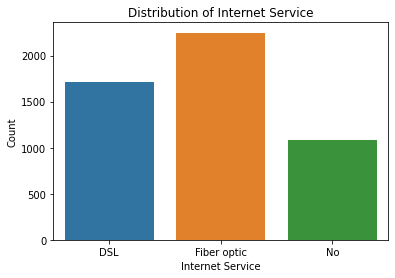

In [280]:
#The distribution of Internet Service
sns.countplot(x='InternetService', data=train)
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Distribution of Internet Service')
plt.show()

From the graph, it appears that the majority of people in the dataset have Fiber optic as their internet service provider. This is indicated by the higher count or frequency of the "Fiber optic" category compared to other categories.
The second most common internet service provider is DSL (Digital Subscriber Line), which has a lower count compared to Fiber optic but still represents a significant portion of the dataset.

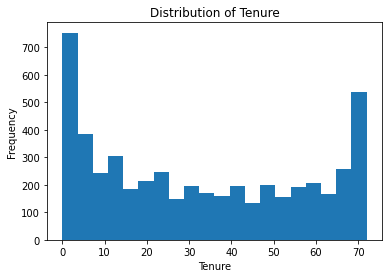

In [281]:
# Plot a histogram for 'tenure'
plt.hist(train['tenure'], bins=20)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()

The histogram shows that there are relatively high frequencies of customers at the beginning and end of their tenure periods, with lower frequencies in the middle.
The middle curve, may indicate a potential period where customers are more likely to churn or transition to different services.

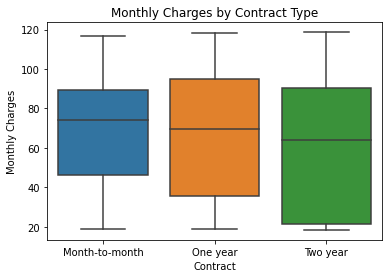

In [282]:
#distribution of monthly charges across different contract types.
sns.boxplot(x='Contract', y='MonthlyCharges', data=train)
plt.xlabel('Contract')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Contract Type')
plt.show()